# Drug analysis workflow

In [1]:
import pandas as pd
from numpy import log
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

# Read in the data

In [2]:
drugs = pd.read_csv('Data/drug_data.csv')
drugs

,drug,replicate,hour,concentration
0,A,1,0,169.468
1,A,1,1,5.644
2,A,1,2,4.459
3,A,1,3,3.940
4,A,1,4,3.169
5,A,1,5,1.479
6,A,2,0,182.933
7,A,2,1,14.016
8,A,2,2,4.035
9,A,2,3,17.807


column name | description
:-- | :--
drug | either drug A or drug B
replicate | a number for each volunteer
hour | time since drug was taken in hours
concentration | the concentration of the drug (mg/L)

# Plot the data

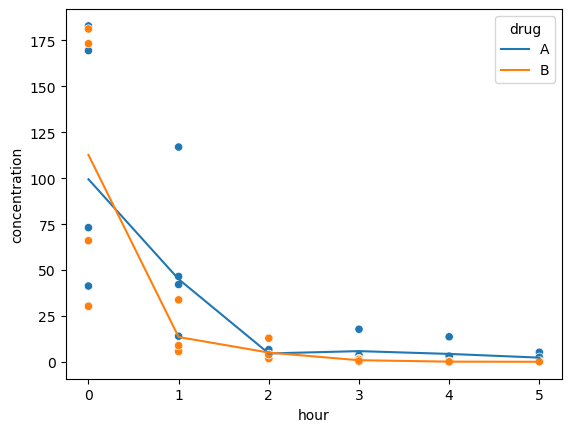

In [3]:
sns.lineplot(data=drugs, x='hour', y='concentration', hue='drug', err_style=None);
sns.scatterplot(data=drugs, x='hour', y='concentration', hue='drug', legend=False);

# Log-transform concentration

In [4]:
drugs['log_conc'] = log(drugs['concentration']).dropna()
drugs

,drug,replicate,hour,concentration,log_conc
0,A,1,0,169.468,5.132664
1,A,1,1,5.644,1.730593
2,A,1,2,4.459,1.494925
3,A,1,3,3.940,1.371181
4,A,1,4,3.169,1.153416
5,A,1,5,1.479,0.391366
6,A,2,0,182.933,5.209120
7,A,2,1,14.016,2.640200
8,A,2,2,4.035,1.395006
9,A,2,3,17.807,2.879592


# Use seaborn to plot a linear regression line with 95% confidence bands

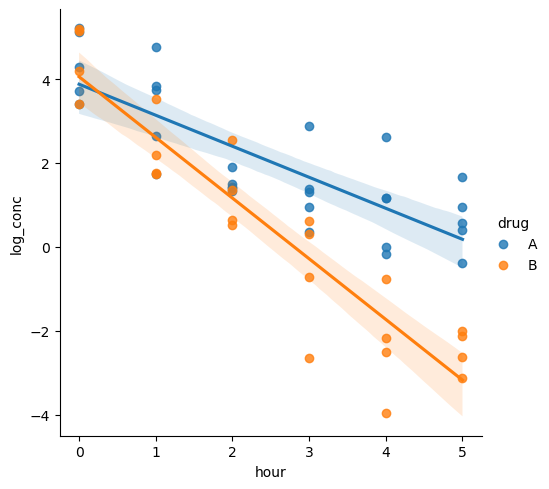

In [5]:
sns.lmplot(data=drugs, x='hour', y='log_conc', hue='drug');

The *y*-intercepts appear to differ little between drugs A and B. But we're not really interested in these.

What we are interested in are the slopes. It looks as if they differ, so this needs testing.

# Fit a linear model

### Fit a linear model

The formula we will use to test for a difference in decay rates between drugs A and B is

```python
formula = 'log_conc ~ drug * hour'
```

This formula means log(concentration) is **linearly related** to the combination of the `drug` given (A or B) and to the `hour` since administration.  

In [6]:
formula = 'log_conc ~ drug*hour'
fit = ols(formula, drugs).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.8779,0.325,11.931,0.000,3.225,4.531
drug[T.B],0.1778,0.488,0.365,0.717,-0.801,1.157
hour,-0.7397,0.107,-6.890,0.000,-0.955,-0.524
drug[T.B]:hour,-0.7069,0.161,-4.390,0.000,-1.030,-0.383


# Check that the model fits the data

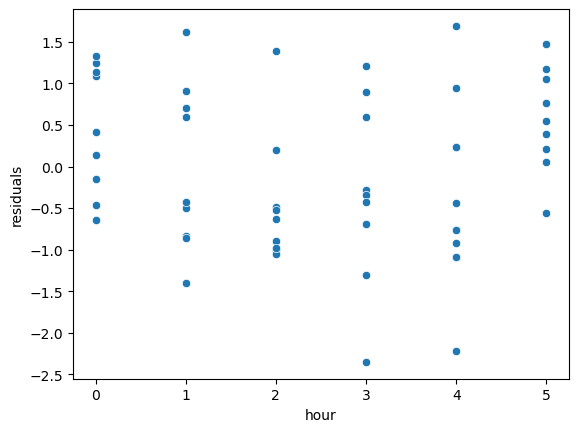

In [7]:
drugs['residuals'] = fit.resid_pearson
sns.scatterplot(data=drugs, x='hour', y='residuals');

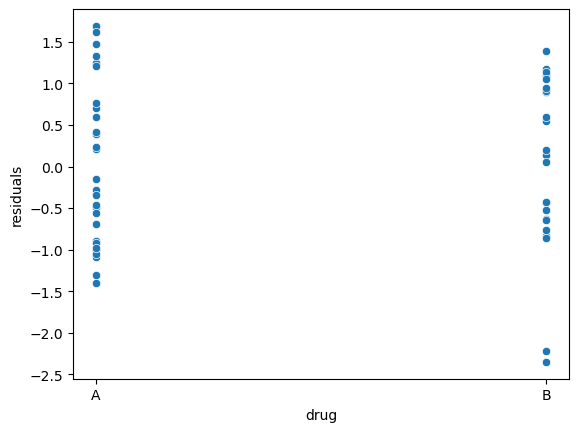

In [8]:
sns.scatterplot(data=drugs, x='drug', y='residuals');

Residuals look fine

# Interpreting the output of the model fit

In [9]:
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.8779,0.325,11.931,0.000,3.225,4.531
drug[T.B],0.1778,0.488,0.365,0.717,-0.801,1.157
hour,-0.7397,0.107,-6.890,0.000,-0.955,-0.524
drug[T.B]:hour,-0.7069,0.161,-4.390,0.000,-1.030,-0.383


The fitting procedure has taken drug A as the reference level.

By default the reference level is the first alphabetically. But you can change this.

The parameters for drug B are estimated **relative** to drug A. 
- That is, the procedure calculates the differences in the *y*-intercepts and the differences in the slopes between drugs A and B.

Row `drug[T.B]` is the difference between the *y*-intercepts of drugs A and B.

![](Figures/drugs_D_intercept.svg)

The estimated difference between the *y*-intercept is 0.18 ± 0.49
- The standard error (the uncertainty in the estimate) is larger than estimate itself
- The *t*-statistic equals 0.365
- The *p*-value is 0.717
- The 95% CI contains zero (-0.801, 1.157)

The probability of observing a *t*-statistic as extreme as 0.365 assuming there were no difference in the *y*-intercepts is 72%. 
- That's very probable
- We do not reject the null hypothesis that the difference in the *y*-intercept is zero
- We conclude there is no significant difference in the *y*-intercepts

Row `drug[T.B]:hour` is the difference between the slopes of drugs A and B. 

The difference in the slopes is -0.71 ± 0.16

The slope of drug A is -0.76

The slope of drug B is -0.76 - 0.71 = -1.47

![](Figures/drugs_D_slopes.svg)

The *p*-value of the test that the difference in the slopes is different from zero is < 0.001.

The confidence interval for the difference in the slopes is (-1.03, -0.38). It does not contain zero.

Therefore, we can be confident that there is significant difference in the slopes. 

Which means we can be confident that drugs A and B have significantly different decay rates and, therefore, half-lives.

# Change the reference level of a factor

By default the reference level is the first alphabetically. So drug A is the reference.

This can be changed so that drug B is the reference.

```python
# drug A is the reference level by default
formula = 'log_conc ~ drug * hour'

# change reference level to drug B
formula = 'log_conc ~ C(drug, Treatment("B")) * hour'
```

In [10]:
formula = 'log_conc ~ C(drug, Treatment("B")) * hour'
fit_refB = ols(formula, drugs).fit()
fit_refB.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.0557,0.363,11.161,0.000,3.326,4.786
"C(drug, Treatment(""B""))[T.A]",-0.1778,0.488,-0.365,0.717,-1.157,0.801
hour,-1.4465,0.120,-12.052,0.000,-1.688,-1.205
"C(drug, Treatment(""B""))[T.A]:hour",0.7069,0.161,4.390,0.000,0.383,1.030


You can see that the differences in *y*-intercepts are just the negative of each other (-0.1778 vs. 0.1778)

And the same for the differences in slopes (0.7069 vs. -0.7069)

# Estimate half-lives of drugs A and B

In [11]:
print('Estimated parameters')
mu = fit.params
print(mu)

print('')
print('Uncertainty (standard error) in the parameters')
se = fit.bse
print(se)

Estimated parameters
Intercept         3.877879
drug[T.B]         0.177773
hour             -0.739654
drug[T.B]:hour   -0.706854
dtype: float64

Uncertainty (standard error) in the parameters
Intercept         0.325013
drug[T.B]         0.487519
hour              0.107348
drug[T.B]:hour    0.161022
dtype: float64


In [12]:
rA = mu['hour']
rB = mu['hour'] + mu['drug[T.B]:hour']

thalfA = -log(2)  / rA
thalfB = -log(2)  / rB

print(f'estimated half life of drug A = {thalfA:.2f} h')
print(f'estimated half life of drug B = {thalfB:.2f} h')

estimated half life of drug A = 0.94 h
estimated half life of drug B = 0.48 h


### Report the result

The decay rates of drugs A and B are significantly different ($\Delta r = 0.71\pm 0.16\ \text{h}^{-1}$, 95% CI = (0.38, 1.03), $t=4.4$, $p<0.001$). The half-life of drug A is 0.94 h and the half-life of drug B is 0.48 h.